In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from forecaster import retriever

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import math
import numpy as np
from scipy import stats

In [3]:
data = retriever.get_data('bitcoin')

data.head(10)

,price,transactions,very_negative_reply,negative_reply,neutral_reply,positive_reply,very_positive_reply,total_reply,very_negative_topic,negative_topic,neutral_topic,positive_topic,very_positive_topic,views,total_topic,today_price,today_transactions
date,,,,,,,,,,,,,,,,,
2010-07-18,-1.0,-1.0,0.0,1.0,0.0,4.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,421
2010-07-19,-1.0,1.0,1.0,0.0,7.0,5.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,420
2010-07-20,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,508
2010-07-21,-1.0,-1.0,0.0,2.0,3.0,3.0,7.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,604
2010-07-22,1.0,-1.0,0.0,0.0,3.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,454
2010-07-23,-1.0,1.0,0.0,1.0,3.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,397
2010-07-24,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,414
2010-07-25,1.0,1.0,0.0,4.0,14.0,4.0,2.0,24.0,0.0,0.0,0.0,1.0,0.0,30103.0,1.0,0.05,889
2010-07-26,-1.0,-1.0,0.0,1.0,2.0,0.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,1822


In [4]:
data['price'].size

2024

# Dados Faltantes

In [5]:
miss_data = retriever.get_data('bitcoin', -1)

totalnan = 0
totalignored = 0
for c in miss_data.columns:
    dict_ = {}
    # Get values
    v = miss_data[c].values

    # Get indices of all missing values
    isnan = np.where(v == -1)[0]

    # Get indices lower than 1250
    ignored = np.where(isnan < 1250)[0]

    totalnan += isnan.size
    totalignored += ignored.size

    print(
        c,
        '\n\t- Total of missing values:', len(isnan),
        '\n\t- Ignored missing values:', len(ignored),
    )
    if isnan.size != 0:
        print('\t- Percentage ignored:', len(ignored)/len(isnan))

print(
    'Total:',
    '\n\t- Total of missing values:', totalnan,
    '\n\t- Ignored missing values:', totalignored,
    '\n\t- Percentage ignored:', totalignored/totalnan
)    

price 
	- Total of missing values: 0 
	- Ignored missing values: 0
transactions 
	- Total of missing values: 0 
	- Ignored missing values: 0
very_negative_reply 
	- Total of missing values: 214 
	- Ignored missing values: 211
	- Percentage ignored: 0.985981308411215
negative_reply 
	- Total of missing values: 214 
	- Ignored missing values: 211
	- Percentage ignored: 0.985981308411215
neutral_reply 
	- Total of missing values: 214 
	- Ignored missing values: 211
	- Percentage ignored: 0.985981308411215
positive_reply 
	- Total of missing values: 214 
	- Ignored missing values: 211
	- Percentage ignored: 0.985981308411215
very_positive_reply 
	- Total of missing values: 214 
	- Ignored missing values: 211
	- Percentage ignored: 0.985981308411215
total_reply 
	- Total of missing values: 214 
	- Ignored missing values: 211
	- Percentage ignored: 0.985981308411215
very_negative_topic 
	- Total of missing values: 899 
	- Ignored missing values: 895
	- Percentage ignored: 0.9955506117908788


In [26]:
for c in data.columns:
    dict_ = {}
    for v in data[c].iloc[1250:]:
        if v not in dict_:
            dict_[v] = 0
        dict_[v] += 1

    it = list(dict_.items())
    it.sort(key=lambda x: x[1], reverse=True)
    print(c, it[:15], '\n')

price [('-1.0', 403), ('1.0', 371)] 

transactions [('-1.0', 423), ('1.0', 351)] 

very_negative_reply [(39.0, 25), (47.0, 24), (36.0, 24), (30.0, 23), (52.0, 23), (40.0, 22), (33.0, 20), (41.0, 20), (38.0, 19), (35.0, 18), (27.0, 17), (49.0, 17), (44.0, 16), (46.0, 16), (43.0, 15)] 

negative_reply [(50.0, 26), (53.0, 22), (54.0, 22), (45.0, 22), (68.0, 22), (56.0, 18), (52.0, 18), (49.0, 18), (61.0, 17), (64.0, 17), (55.0, 16), (60.0, 16), (42.0, 15), (66.0, 14), (75.0, 13)] 

neutral_reply [(107.0, 15), (98.0, 15), (83.0, 13), (82.0, 12), (88.0, 12), (110.0, 12), (97.0, 12), (71.0, 12), (121.0, 12), (95.0, 11), (103.0, 11), (96.0, 11), (89.0, 11), (102.0, 10), (111.0, 10)] 

positive_reply [(90.0, 19), (85.0, 16), (92.0, 14), (107.0, 14), (91.0, 14), (86.0, 13), (109.0, 13), (87.0, 13), (88.0, 13), (111.0, 12), (110.0, 12), (106.0, 12), (82.0, 12), (64.0, 11), (69.0, 11)] 

very_positive_reply [(140.0, 15), (111.0, 15), (110.0, 14), (154.0, 13), (123.0, 12), (105.0, 12), (115.0, 11)

In [6]:
nancount = 0
notnan = 0
for vn in data['very_negative_reply']:
    if math.isnan(vn):
        nancount += 1
    else:
        notnan += 1

        
print(nancount, notnan, nancount+notnan)

0 2024 2024


In [6]:
label_radicals = ['price', 'transactions']
label_modifiers = ['today_', '']

user_radicals = ['topic', 'reply']
user_modifiers = ['very_negative_', 'negative_', 'neutral_', 'positive_', 'very_positive_', 'total_']

other_headers = ['views']

# Every position contains a tuple with the column headers radical, its modifiers and a boolean
# The boolean tells if the headers radical and modifiers are related to the label columns.
radical_modifier = [
    (label_radicals, label_modifiers, True),
    (user_radicals, user_modifiers, False),
    (other_headers, [], False)
]

# Maps the column header to the graph's title and line config
header_info = {
    'price': ('Flutuações no preço do Bitcoin', 'o'),
    'today_price': ('Preço do Bitcoin', '-'),
    'transactions': ('Flutuações na quantidades de transações na rede Bitcoin', '-'),
    'today_transactions': ('Quantidades de transações na rede Bitcoin', '-'),
    'very_negative_topic': ('Quantidade de tópicos muito negativos', '-'),
    'negative_topic': ('Quantidade de tópicos negativos', '-'),
    'neutral_topic': ('Quantidade de tópicos neutros', '-'),
    'positive_topic': ('Quantidade de tópicos positivos', '-'),
    'very_positive_topic': ('Quantidade de tópicos muitos positivos', '-'),
    'total_topic': ('Quantidade total de tópicos', '-'),
    'very_negative_reply': ('Quantidade de comentários muito negativos', '-'),
    'negative_reply': ('Quantidade de comentários negativos', '-'),
    'neutral_reply': ('Quantidade de comentários neutros', '-'),
    'positive_reply': ('Quantidade de comentários positivos', '-'),
    'very_positive_reply': ('Quantidade de comentários muitos positivos', '-'),
    'total_reply': ('Quantidade total de comentários', '-'),
    'views': ('Quantidade total de visualizações no fórum BitcoinTalk', '-')
}

In [7]:
def dualplot(t1, d1, l1, t2, d2, l2):
    fig = plt.figure(figsize=(12,6))

    plt.subplot(2, 1, 1)
    plt.title(t1)
    plt.plot(d1, l1)
    plt.ylabel('Quantidade')

    plt.subplot(2, 1, 2)
    plt.title(t2)
    plt.plot(d2, l2)
    plt.ylabel('Quantidade')
    plt.xlabel('Tempo em dias')

    plt.tight_layout()
    plt.show()

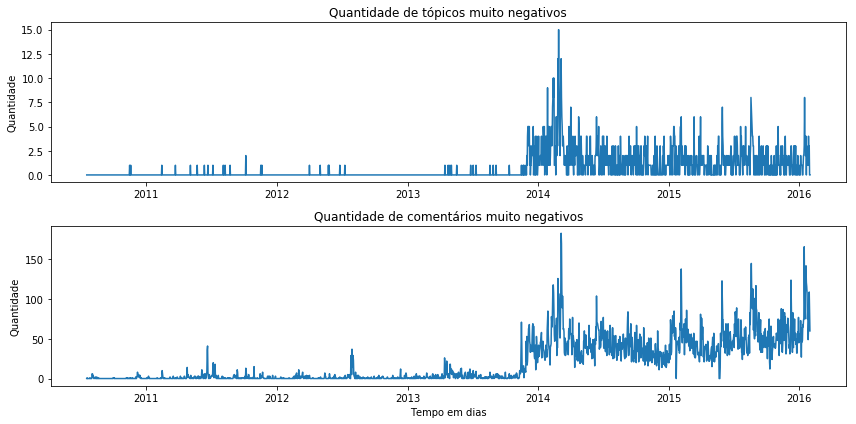

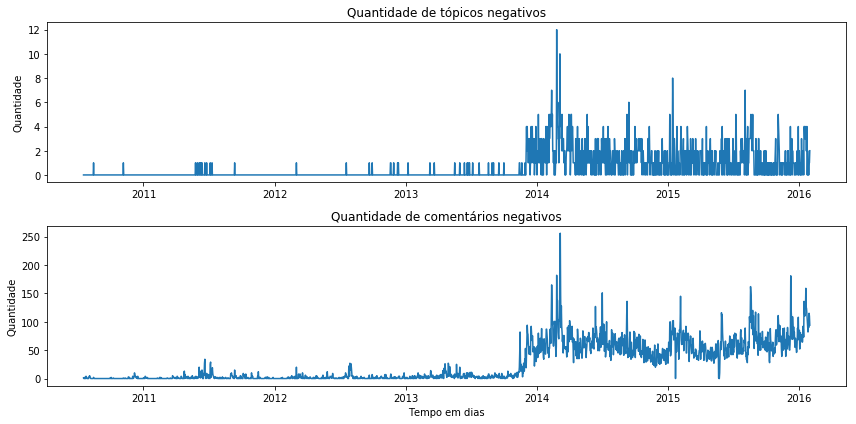

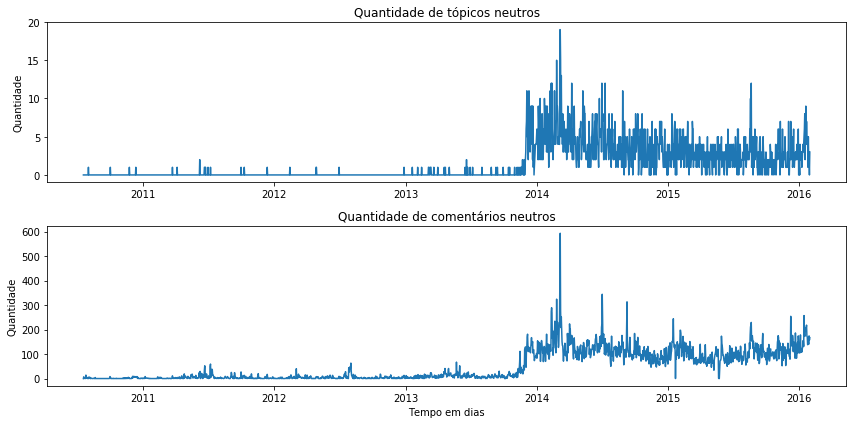

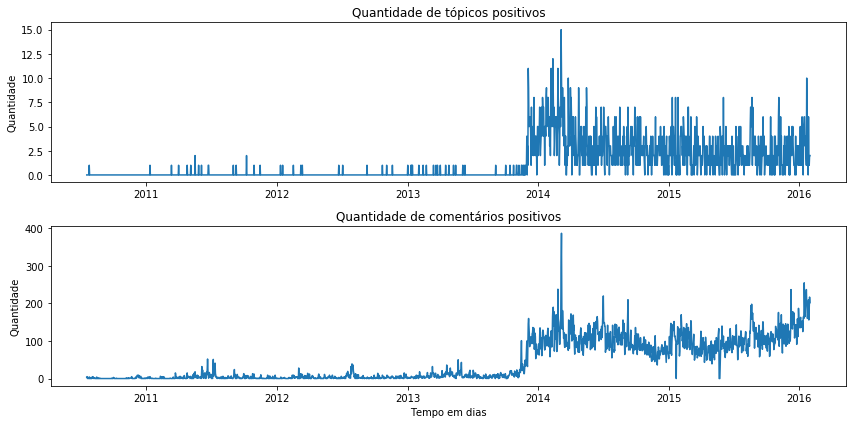

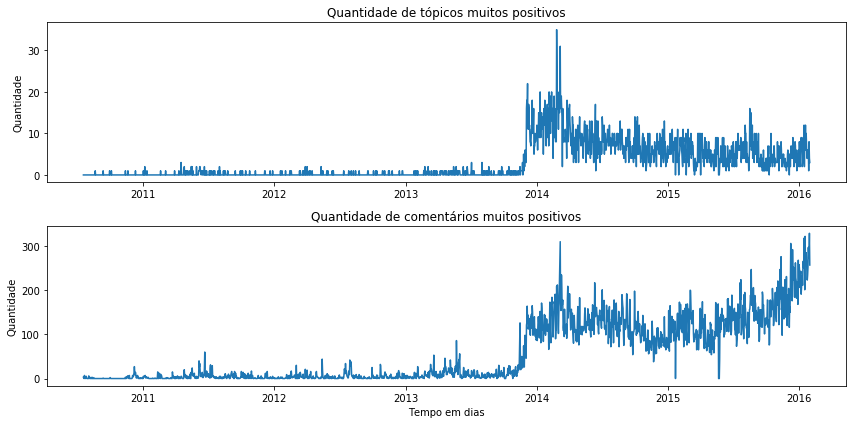

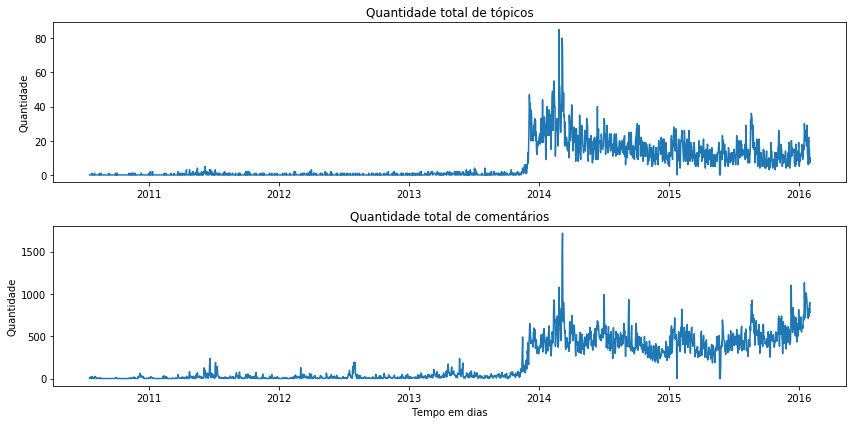

In [8]:
for mod in user_modifiers:
    header1 = mod + user_radicals[0]
    header2 = mod + user_radicals[1]

    info1 = header_info[header1]
    info2 = header_info[header2]

    dualplot(info1[0], data[header1], info1[1], info2[0], data[header2], info2[1])
        

Preço do Bitcoin - Flutuações no preço do Bitcoin o


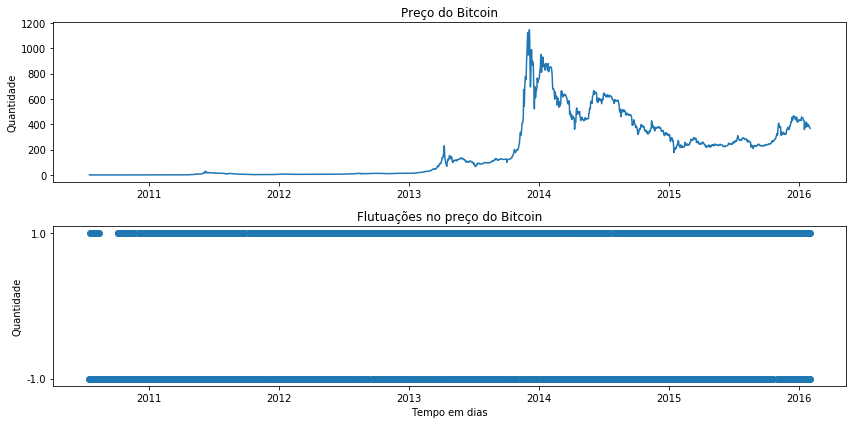

Quantidades de transações na rede Bitcoin - Flutuações na quantidades de transações na rede Bitcoin -


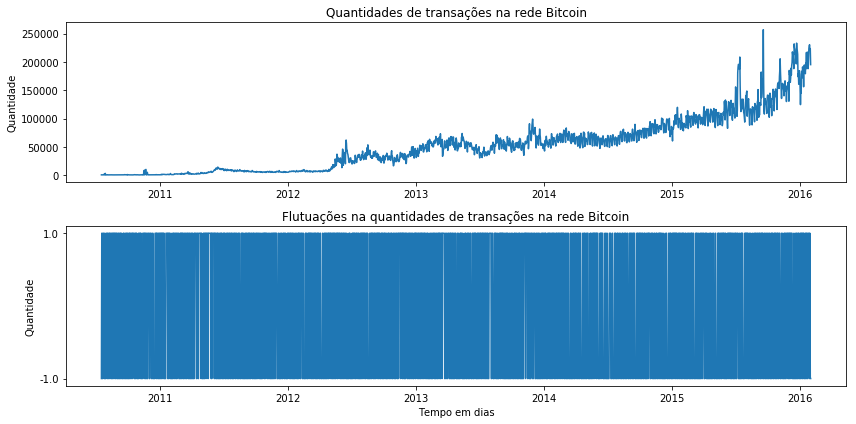

In [9]:
for rad in label_radicals:
    header1 = label_modifiers[0] + rad
    header2 = label_modifiers[1] + rad

    info1 = header_info[header1]
    info2 = header_info[header2]

    print(info1[0], info1[1], info2[0], info2[1])
    
    dualplot(info1[0], data[header1], info1[1], info2[0], data[header2], info2[1])
        

In [ ]:
np.where(data['price'].values == '0.0')[0]
data['price'].values[6]
data['price'].replace('0.0', 'asdsad')